# DS-NYC-DAT-45 | Final Project 3: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('HR/HR_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
df.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department'}, inplace=True)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [4]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Data Dictionary

Variable | Description | Type of Variable | Range
---|---|---|---
satisfaction_level | Satisfaction level of employee based on survey | Continuous | [0.09, 1]
last_evaluation | Score based on employee's last evaluation | Continuous | [0.36, 1]
number_project | Number of projects | Continuous | [2, 7]
average_monthly_hours | Average monthly hours | Continuous | [96, 310]
time_spend_company | Years at company | Continuous | [2, 10]
Work_accident | Whether employee had a work accident | Categorical | {0, 1}
left | Whether employee had left (Outcome Variable) | Categorical | {0, 1}
promotion_last_5years | Whether employee had a promotion in the last 5 years | Categorical | {0, 1}
department | Department employee worked in | Categorical | 10 departments 
salary | Level of employee's salary | Categorical | {low, medium, high}

In [5]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### No two variables are highly correlated:
- Highest correlation is between number of projects and average monthly hours (0.42)
- Variable most correlated with outcome variable `left` is `satisfaction_level` with `-0.39`, understandably dissatisfied employees leave.
- Interestingly, variables such as `last_evaluation` and `promotion_last_5years`, that I would think would have a certain degree of (negative) correlation had very low correlation with the outcome variable.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

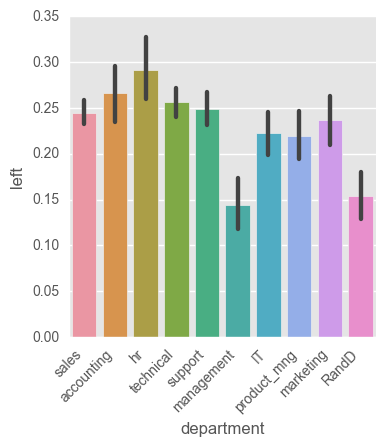

In [7]:
# Attrition by department
plot = sns.factorplot(x='department', y='left', kind='bar', data=df)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

- Most departments are in the 20-30% range of percentage of employees leaving, which is comparable to the overall rate of 24%.
- The exceptions are management and R&D, which have only about 15% of employees that have left. (More on this below.)

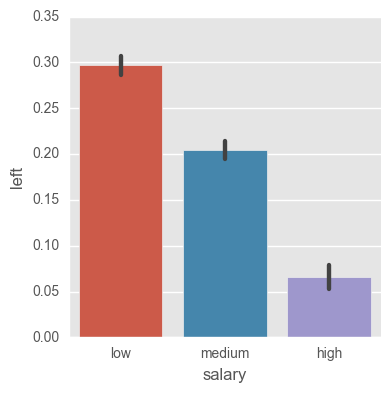

In [8]:
# Attrition by salary level
plot = sns.factorplot(x='salary', y='left', kind='bar', data=df);

- Higher salary employees have lower attrition rates - makes sense intuitively.
- The earlier comment on management having lower attrition is consistent with relatively large proportion of management having high levels of salary.

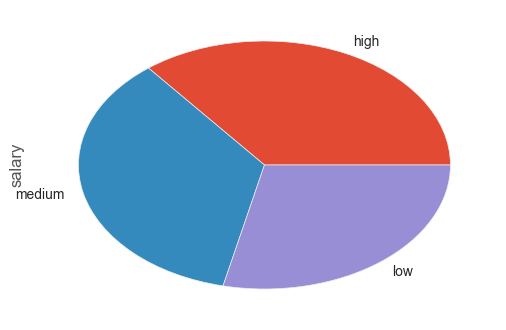

In [9]:
df[df['department']=='management']['salary'].value_counts().plot(kind='pie');

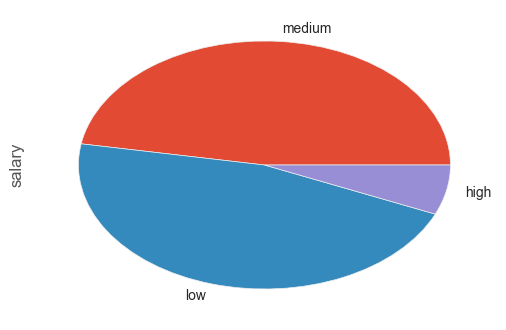

In [10]:
df[df['department']=='RandD']['salary'].value_counts().plot(kind='pie');

- On the other hand, R&D has similar salary distribution to rest of the company. Other factors might be in play here.

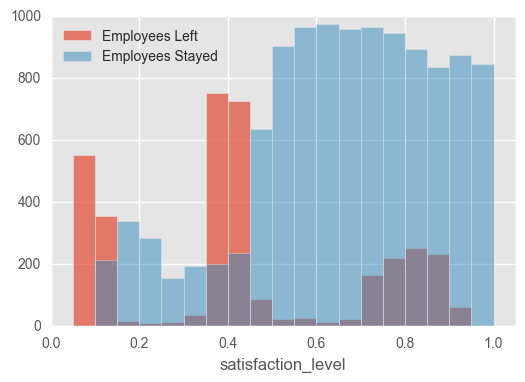

In [11]:
# Satisfaction level vs. Attrition
bins = np.linspace(0.0001, 1.0001, 21)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=0.7, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha=0.5, label='Employees Stayed')
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

- As expected, employees who have stayed are generally more satisfied than those who have left.
- Interestingly, there is a peak around `0.4` and also a good amount in the `(0.7, 0.9)` range of satisfaction level scores of employees who have left (but not much in between). Learning more about these two groups, especially the latter group, could potentially shed some light into the type of employees who would be leaving next.

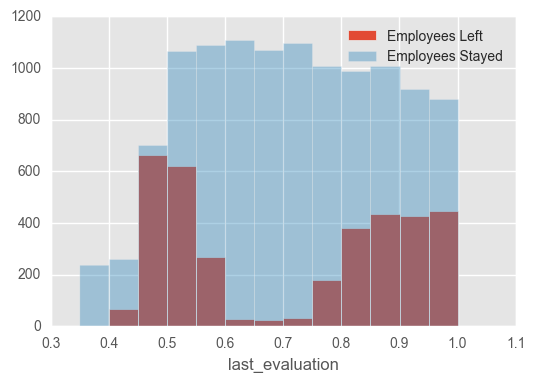

In [12]:
# Last evaluation vs. Attrition
bins = np.linspace(0.3501, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('last_evaluation')
plt.legend(loc='best');

- Two large groups of former employees, high performing group and poorly performing group - explains the nearly zero correlation between `last_evaluation` and the outcome variable.

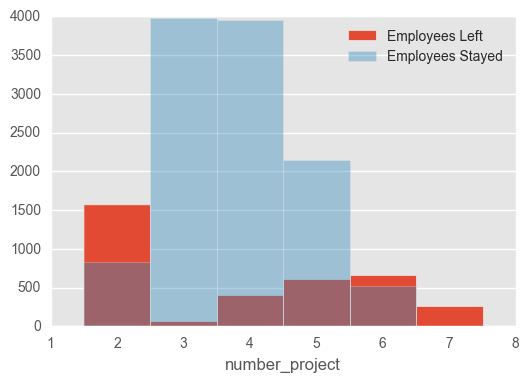

In [13]:
# Number of projects vs. Attrition
bins = np.linspace(1.5, 7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('number_project')
plt.grid(axis='x')
plt.legend(loc='best');

- (Above) Too few projects = bad, too many projects = bad. Sweet spot is in the 3-4 range.
- (Below) Similarly, attrition exists in both long and short hours worked. Sweet spot of low attrition is around the median value of 200 hours. (Ignoring employees with less than 125 hours worked - possibly part-time workers.)

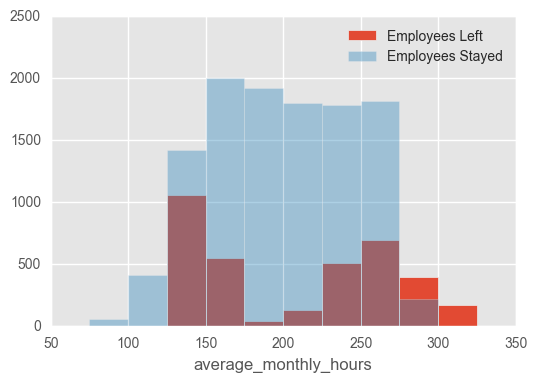

In [14]:
# Average monthly hours vs. Attrition
bins = np.linspace(75, 325, 11)
plt.hist(df[df['left']==1]['average_monthly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_monthly_hours'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('average_monthly_hours')
plt.legend(loc='best');

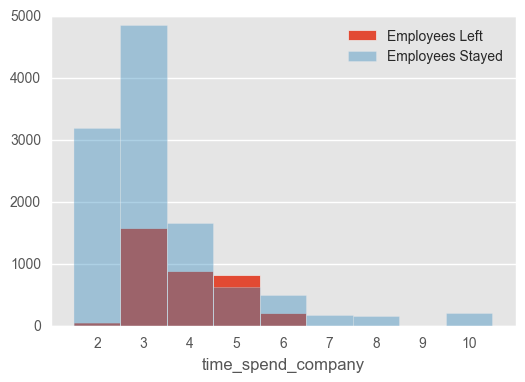

In [15]:
# Years at company vs. Attrition
bins = np.linspace(1.5, 10.5, 10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('time_spend_company')
plt.xlim((1,11))
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.legend(loc='best');

- Relatively young company - longest tenure is 10 years.
- Nobody left after working 7 years or longer in the company.
- Employees in the year 5 group have the highest flight risk.

In [16]:
df[df['left']==1]['time_spend_company'].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

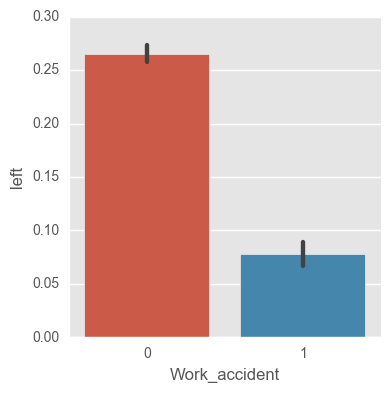

In [17]:
# Attrition by whether employee had work accident
plot = sns.factorplot(x='Work_accident', y='left', kind='bar', data=df);

In [18]:
# Percentage of employees who had work accident
df['Work_accident'].mean()

0.1446096406427095

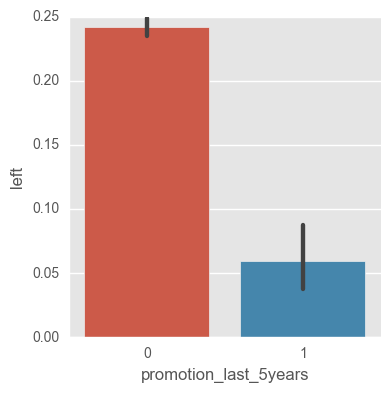

In [19]:
# Attrition by whether employee had promotion in last 5 years
plot = sns.factorplot(x='promotion_last_5years', y='left', kind='bar', data=df);

- Expected results above. Promoted employees tend to stay.
- Very low promotion rate (~2%)! Might be the cause of people leaving after 3-5 years.

In [20]:
# Percentage of employees who had promotion in last 5 years
df['promotion_last_5years'].mean()

0.021268084538969265